In [1]:
import numpy as np,\
pandas as pd,\
seaborn as sns,\
matplotlib.pyplot as plt,\
scipy.stats as norm,\
sklearn.preprocessing as StandardScaler

from scipy import stats
from matplotlib.backends.backend_agg import FigureCanvasAgg

import warnings
warnings.filterwarnings('ignore')  #for future warnings


%matplotlib inline

In [2]:
test_data = pd.read_csv('../input/test.csv')

In [3]:
train_data = pd.read_csv('../input/train.csv')

In [4]:
print(train_data['SalePrice'].describe())
print()
print("Skewness = ", train_data['SalePrice'].skew())
print("Kurtosis = ", train_data['SalePrice'].kurt())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness =  1.8828757597682129
Kurtosis =  6.536281860064529


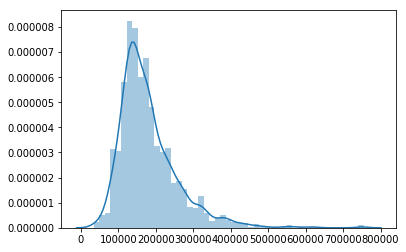

In [5]:
plot = sns.distplot([train_data['SalePrice']])
plot.get_figure().savefig('../images/salepricedist.png')

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

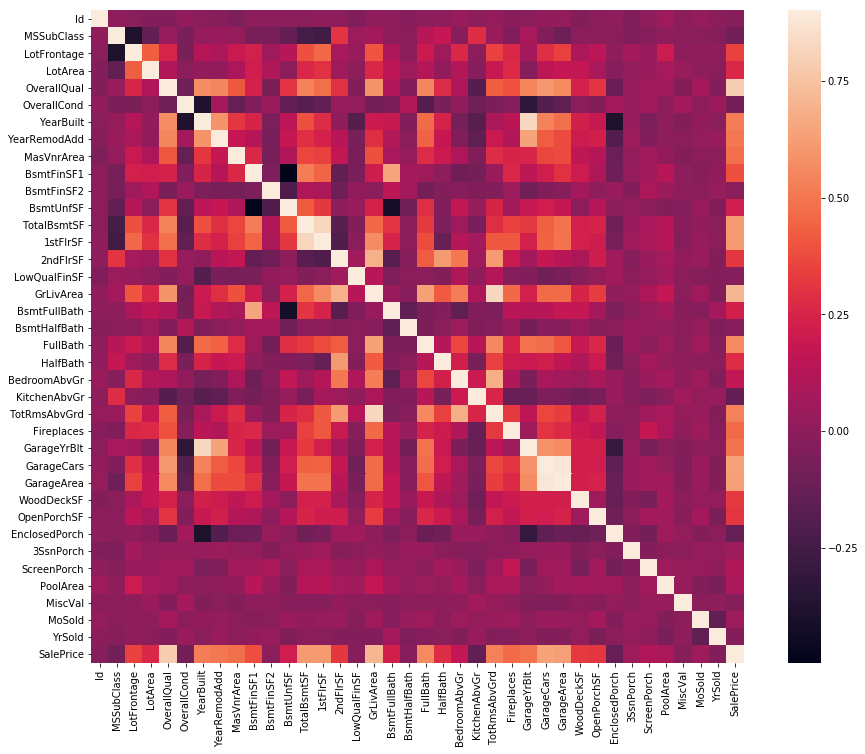

In [7]:
correlation_matrix = train_data.corr()
plt.subplots(figsize = (16, 12))

plot = sns.heatmap(correlation_matrix, square = True, vmax = 0.9)
plot.get_figure().savefig('../images/heatmap.png', dpi = 1000)


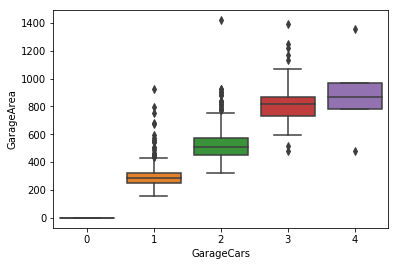

In [8]:
var1 = 'GarageArea'
var2 = 'GarageCars'
data = pd.concat([train_data[var1], train_data[var2]], axis = 1)
plot = sns.boxplot(x = var2, y = var1, data = data)
plot.get_figure().savefig('../images/garagearea-garagecars.png')
#drop garageArea

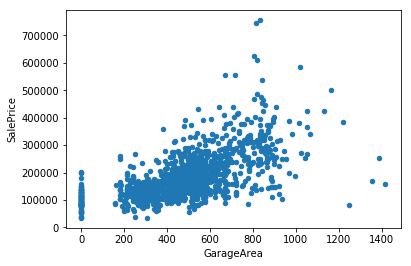

In [9]:
var1 = 'GarageArea'
var2 = 'SalePrice'
data = pd.concat([train_data[var1], train_data[var2]], axis = 1)
plot = data.plot.scatter(x = var1, y = var2)
plot.get_figure().savefig('../images/garagearea-saleprice.png')

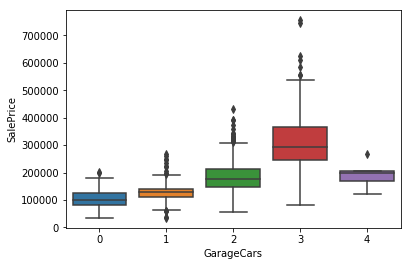

In [10]:
var1 = 'GarageCars'
var2 = 'SalePrice'
data = pd.concat([train_data[var1], train_data[var2]], axis = 1)
plot = sns.boxplot(x = var1, y = var2, data = data)
plot.get_figure().savefig('../images/garagecars-saleprice.png')

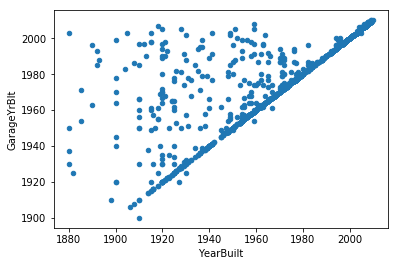

In [11]:
var1 = 'YearBuilt'
var2 = 'GarageYrBlt'
data = pd.concat([train_data[var1], train_data[var2]], axis = 1)
plot = data.plot.scatter(x = var1, y = var2)
plot.get_figure().savefig('../images/yearbuilt-garageyrblt.png')
#drop garageArea

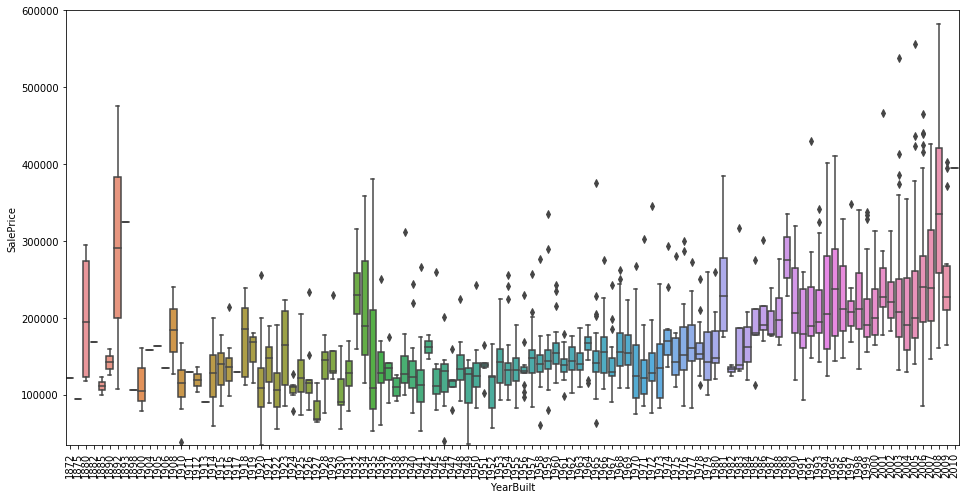

In [12]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plot = sns.boxplot(x=var, y="SalePrice", data=data)
plot.axis(ymin = 34000, ymax = 600000)
plt.xticks(rotation=90);
plot.get_figure().savefig('../images/yearbuilt-saleprice.png')

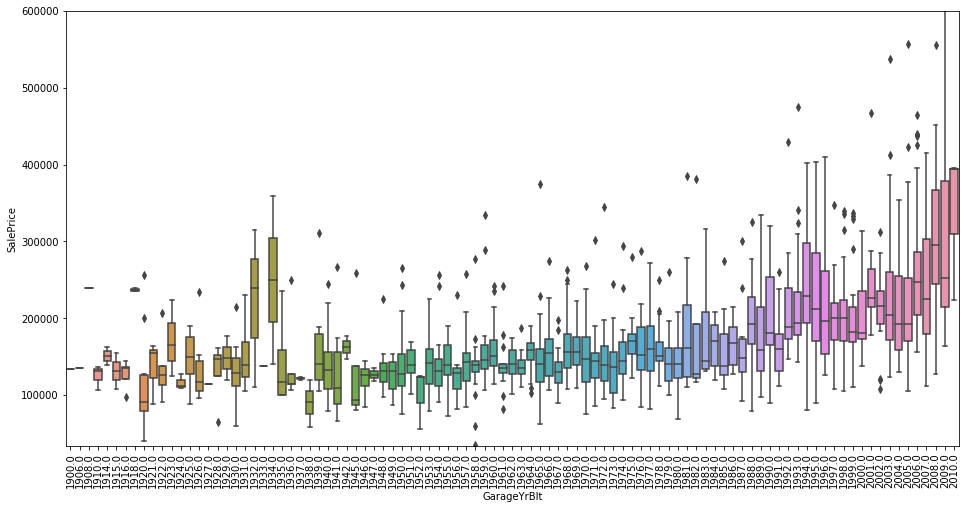

In [13]:
var = 'GarageYrBlt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plot = sns.boxplot(x=var, y="SalePrice", data=data)
plot.axis(ymin = 34000, ymax = 600000)
plt.xticks(rotation=90);
plot.get_figure().savefig('../images/garageyrblt-saleprice.png')

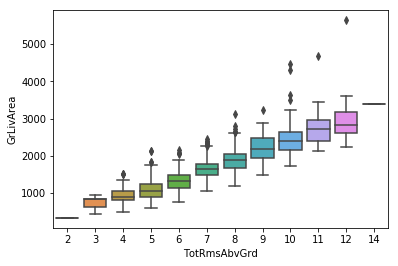

In [14]:
var1 = 'TotRmsAbvGrd'
var2 = 'GrLivArea'
data = pd.concat([train_data[var1], train_data[var2]], axis = 1)
plot = sns.boxplot(x = var1, y = var2, data = data)
plot.get_figure().savefig('../images/totrms-grlivarea.png')\

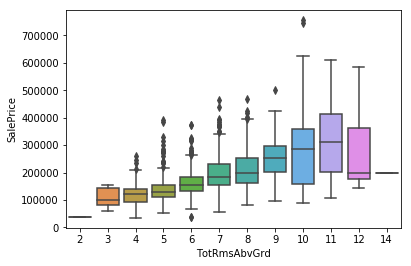

In [15]:
var = 'TotRmsAbvGrd'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
plot = sns.boxplot(x=var, y="SalePrice", data=data)
plot.get_figure().savefig('../images/totrms-saleprice.png')

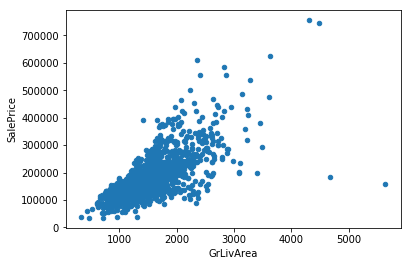

In [16]:
var1 = 'GrLivArea'
var2 = 'SalePrice'
data = pd.concat([train_data[var1], train_data[var2]], axis = 1)
plot = data.plot.scatter(x = var1, y = var2)
plot.get_figure().savefig('../images/grlivarea-saleprice.png')
#drop garageArea

In [17]:
train_data_mod = train_data.drop(['GarageArea', 'TotRmsAbvGrd'], 1)

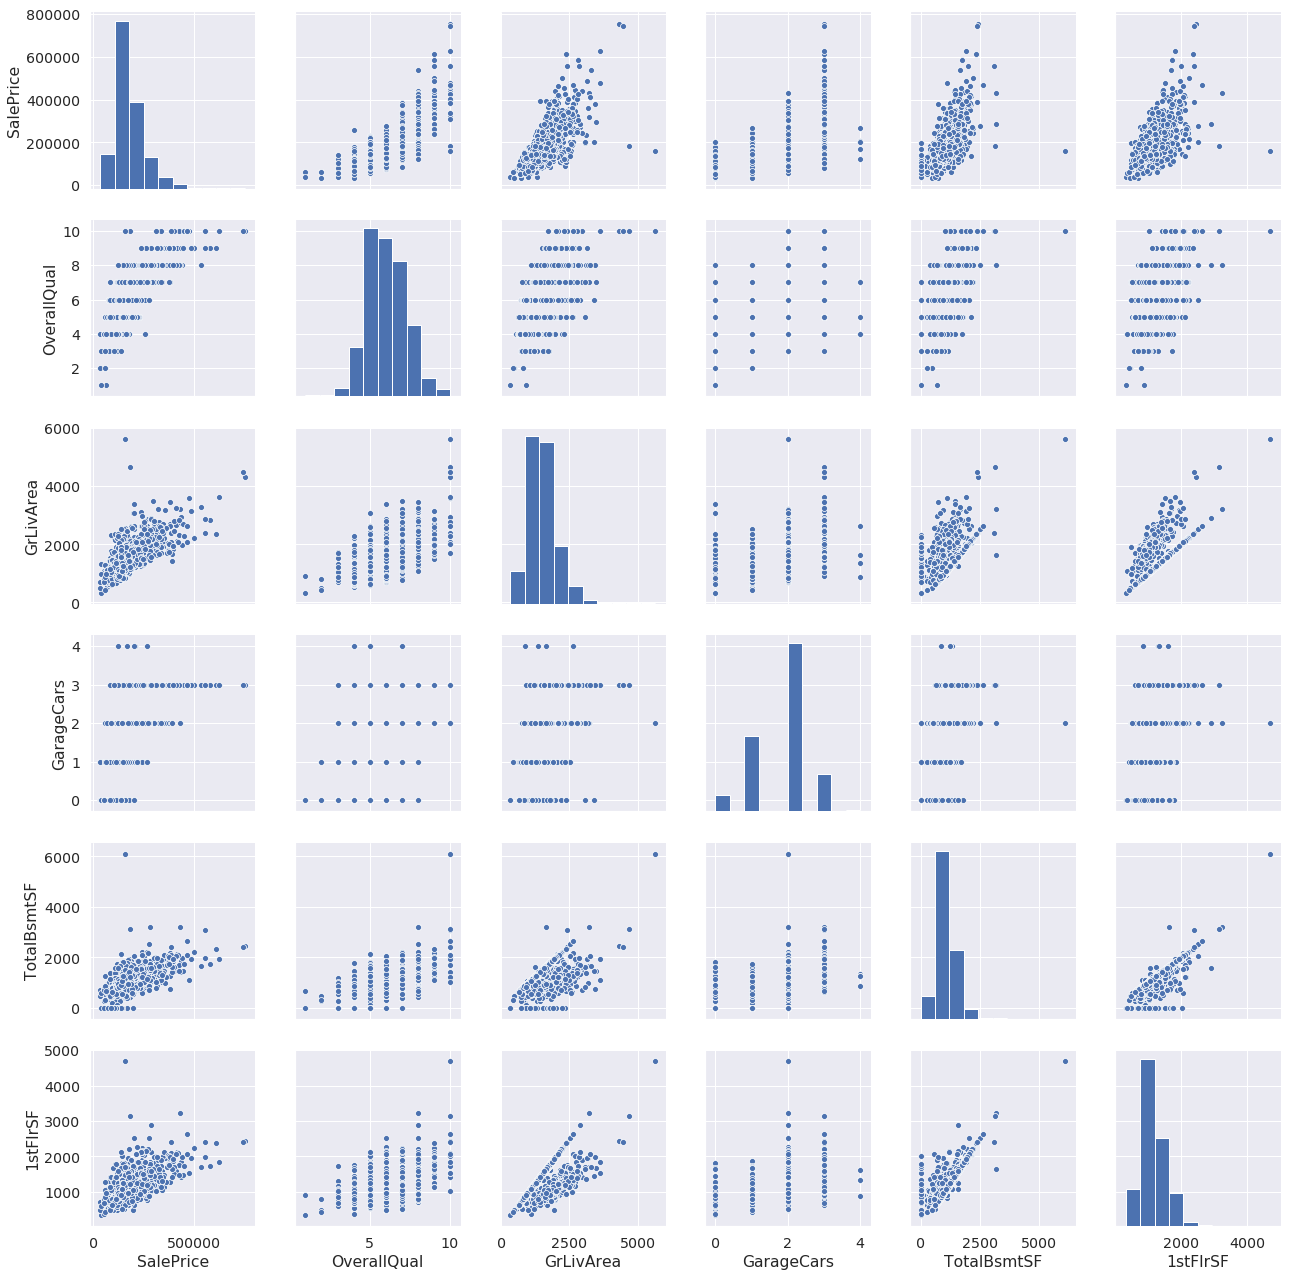

In [18]:
corr_mat = train_data_mod.corr()
cols = corr_mat['SalePrice'].nlargest(6).index
sns.set(font_scale = 1.3)
plot = sns.pairplot(train_data_mod[cols], size = 3)
plt.show()
plot.savefig('../images/saleprice-pairplot.png')

In [19]:
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
numerical_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
# for i in categorical_features:
#     print(i, end = ', ')
# print('\n\n')
# for i in numerical_features:
#     print(i, end = ', ')

for i in range(7):
    numerical_features.append(' ')
for i in zip(categorical_features, numerical_features):
    print(i[0], '&', i[1], repr("\\")[1:3])

MSZoning & MSSubClass \\
Street & LotFrontage \\
Alley & LotArea \\
LotShape & OverallQual \\
LandContour & OverallCond \\
Utilities & YearBuilt \\
LotConfig & YearRemodAdd \\
LandSlope & MasVnrArea \\
Neighborhood & BsmtFinSF1 \\
Condition1 & BsmtFinSF2 \\
Condition2 & BsmtUnfSF \\
BldgType & TotalBsmtSF \\
HouseStyle & 1stFlrSF \\
RoofStyle & 2ndFlrSF \\
RoofMatl & LowQualFinSF \\
Exterior1st & GrLivArea \\
Exterior2nd & BsmtFullBath \\
MasVnrType & BsmtHalfBath \\
ExterQual & FullBath \\
ExterCond & HalfBath \\
Foundation & BedroomAbvGr \\
BsmtQual & KitchenAbvGr \\
BsmtCond & TotRmsAbvGrd \\
BsmtExposure & Fireplaces \\
BsmtFinType1 & GarageYrBlt \\
BsmtFinType2 & GarageCars \\
Heating & GarageArea \\
HeatingQC & WoodDeckSF \\
CentralAir & OpenPorchSF \\
Electrical & EnclosedPorch \\
KitchenQual & 3SsnPorch \\
Functional & ScreenPorch \\
FireplaceQu & PoolArea \\
GarageType & MiscVal \\
GarageFinish & MoSold \\
GarageQual & YrSold \\
GarageCond &   \\
PavedDrive &   \\
PoolQC &   \

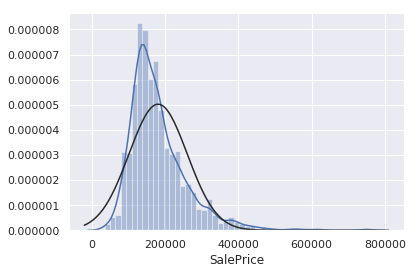

In [20]:
sns.set()
plot = sns.distplot(train_data['SalePrice'], fit = stats.norm)
plot.get_figure().savefig('../images/saleprice-transform1.png')


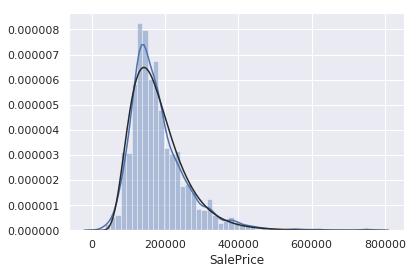

In [21]:
plot = sns.distplot(train_data['SalePrice'], fit = stats.lognorm)
plot.get_figure().savefig('../images/saleprice-transform2.png')

In [22]:
train_data_mod['SalePrice'] = np.log1p(train_data['SalePrice'])
train_data_mod, train_data = train_data, train_data_mod


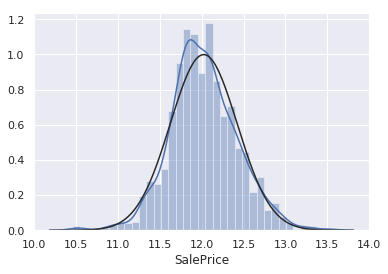

In [23]:
plot = sns.distplot(train_data['SalePrice'], fit = stats.norm)
plot.get_figure().savefig('../images/saleprice-transform3.png')

In [24]:
y_train = train_data[['Id', 'SalePrice']]
x_train = pd.concat((train_data_mod, test_data)).reset_index(drop = True)
x_train = x_train.drop(['SalePrice', 'GarageArea', 'TotRmsAbvGrd', 'Id'], axis = 1)

In [25]:
x_train.shape

(2919, 77)

In [26]:
(x_train.isnull().sum() / len(x_train)).nlargest(35)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
Exterior1st     0.000343
Exterior2nd     0.000343
GarageCars      0.000343
KitchenQual     0.000343
SaleType        0.000343
TotalBsmtSF     0.000343
1stFlrSF        0.000000
2ndFlrSF        0.000000
dtype: float64

In [27]:
for i in zip((x_train.isnull().sum() / len(x_train)).nlargest(50).index, (x_train.isnull().sum() / len(x_train)).nlargest(50)) :
    print(i[0], '&', '{:.6f}'.format(i[1]*100), '\\\\')

PoolQC & 99.657417 \\
MiscFeature & 96.402878 \\
Alley & 93.216855 \\
Fence & 80.438506 \\
FireplaceQu & 48.646797 \\
LotFrontage & 16.649538 \\
GarageCond & 5.447071 \\
GarageFinish & 5.447071 \\
GarageQual & 5.447071 \\
GarageYrBlt & 5.447071 \\
GarageType & 5.378554 \\
BsmtCond & 2.809181 \\
BsmtExposure & 2.809181 \\
BsmtQual & 2.774923 \\
BsmtFinType2 & 2.740665 \\
BsmtFinType1 & 2.706406 \\
MasVnrType & 0.822199 \\
MasVnrArea & 0.787941 \\
MSZoning & 0.137033 \\
BsmtFullBath & 0.068517 \\
BsmtHalfBath & 0.068517 \\
Functional & 0.068517 \\
Utilities & 0.068517 \\
BsmtFinSF1 & 0.034258 \\
BsmtFinSF2 & 0.034258 \\
BsmtUnfSF & 0.034258 \\
Electrical & 0.034258 \\
Exterior1st & 0.034258 \\
Exterior2nd & 0.034258 \\
GarageCars & 0.034258 \\
KitchenQual & 0.034258 \\
SaleType & 0.034258 \\
TotalBsmtSF & 0.034258 \\
1stFlrSF & 0.000000 \\
2ndFlrSF & 0.000000 \\
3SsnPorch & 0.000000 \\
BedroomAbvGr & 0.000000 \\
BldgType & 0.000000 \\
CentralAir & 0.000000 \\
Condition1 & 0.000000 \\
Con

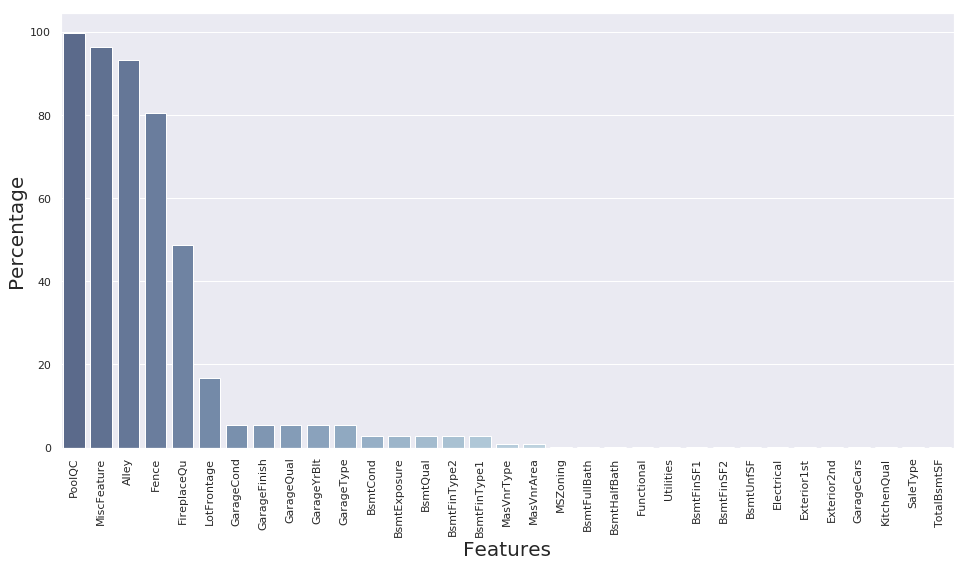

In [28]:
f, ax = plt.subplots(figsize=(16, 8))
temp = ((x_train.isnull().sum() / len(x_train)).nlargest(33)) * 100
fig = sns.barplot(x = temp.index, y = temp, palette = (sorted(sns.color_palette("ch:3,-.15,dark=.4", 20))))
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)

fig.get_figure().savefig('../images/missing-overall.png')

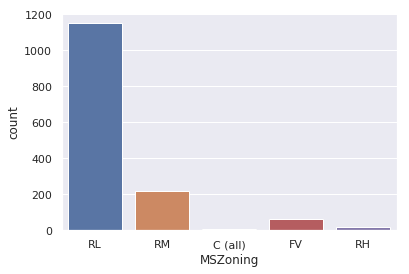

In [29]:
plot = sns.countplot(train_data['MSZoning'])
plot.get_figure().savefig('../images/mszoning-na.png')

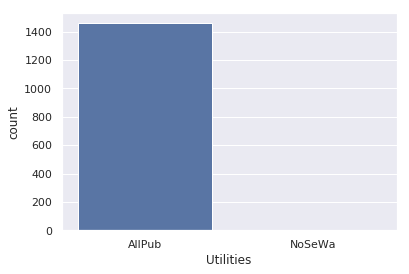

In [30]:
plot = sns.countplot(train_data['Utilities'])
plot.get_figure().savefig('../images/utilities-na.png')

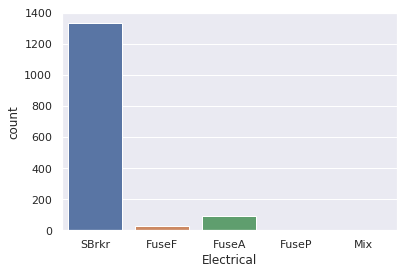

In [31]:
plot = sns.countplot(train_data['Electrical'])
plot.get_figure().savefig('../images/electrical-na.png')

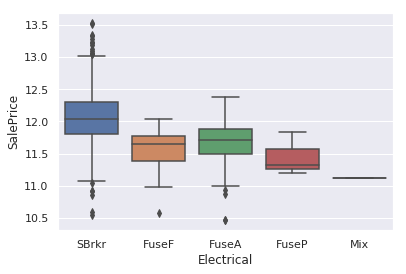

In [32]:
plot = sns.boxplot(x = train_data['Electrical'], y = train_data['SalePrice'])
plot.get_figure().savefig('../images/electrical-na2.png')

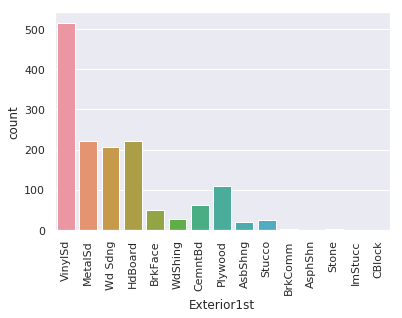

In [33]:
plot = sns.countplot(train_data['Exterior1st'])
plt.xticks(rotation = 90)
plot.get_figure().savefig('../images/exterior1st-na.png')

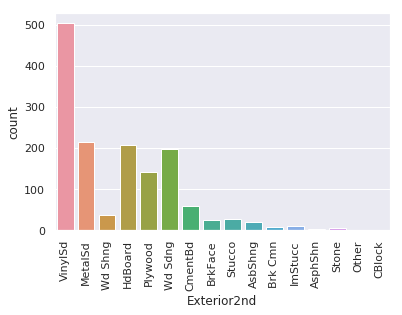

In [34]:
plot = sns.countplot(train_data['Exterior2nd'])
plt.xticks(rotation = 90)
plot.get_figure().savefig('../images/exterior2nd-na.png')

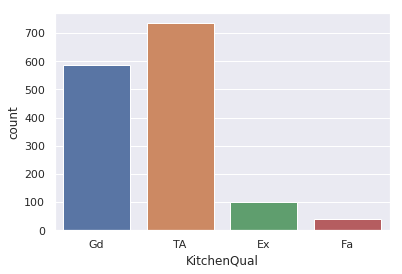

In [35]:
plot = sns.countplot(train_data['KitchenQual'])
plot.get_figure().savefig('../images/kitchenqual-na.png')

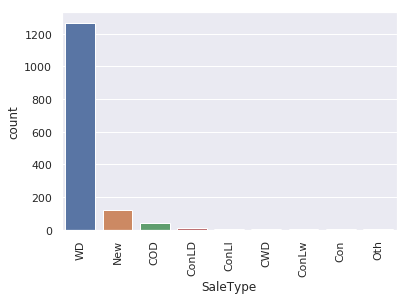

In [36]:
plot = sns.countplot(train_data['SaleType'])
plt.xticks(rotation = 90)
plot.get_figure().savefig('../images/saletype-na.png')

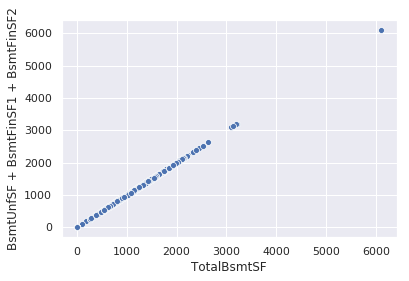

In [45]:
plot = sns.scatterplot(train_data['TotalBsmtSF'], train_data['BsmtUnfSF'] + train_data['BsmtFinSF2'] + train_data['BsmtFinSF1'])
plot.set(ylabel = 'BsmtUnfSF + BsmtFinSF1 + BsmtFinSF2')
plot.get_figure().savefig('../images/bsmtsf.png')

In [250]:
num_features = train_data.dtypes[train_data.dtypes != 'object'].index
skewness = train_data[num_features].apply(lambda x : np.abs(stats.skew(x.dropna()))).sort_values(ascending = False)
for i, j in zip(skewness.index, skewness):
    print(i, '&', '{:.2f}'.format(j), '\\\\' )

skewness.index

MiscVal & 24.45 \\
PoolArea & 14.81 \\
LotArea & 12.20 \\
3SsnPorch & 10.29 \\
LowQualFinSF & 9.00 \\
KitchenAbvGr & 4.48 \\
BsmtFinSF2 & 4.25 \\
ScreenPorch & 4.12 \\
BsmtHalfBath & 4.10 \\
EnclosedPorch & 3.09 \\
MasVnrArea & 2.67 \\
OpenPorchSF & 2.36 \\
LotFrontage & 2.16 \\
BsmtFinSF1 & 1.68 \\
WoodDeckSF & 1.54 \\
TotalBsmtSF & 1.52 \\
MSSubClass & 1.41 \\
1stFlrSF & 1.38 \\
GrLivArea & 1.37 \\
BsmtUnfSF & 0.92 \\
2ndFlrSF & 0.81 \\
OverallCond & 0.69 \\
HalfBath & 0.68 \\
Fireplaces & 0.65 \\
GarageYrBlt & 0.65 \\
YearBuilt & 0.61 \\
BsmtFullBath & 0.60 \\
YearRemodAdd & 0.50 \\
GarageCars & 0.34 \\
OverallQual & 0.22 \\
MoSold & 0.21 \\
BedroomAbvGr & 0.21 \\
SalePrice & 0.12 \\
YrSold & 0.10 \\
FullBath & 0.04 \\
Id & 0.00 \\


Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
       'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'MSSubClass', '1stFlrSF',
       'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'OverallCond', 'HalfBath',
       'Fireplaces', 'GarageYrBlt', 'YearBuilt', 'BsmtFullBath',
       'YearRemodAdd', 'GarageCars', 'OverallQual', 'MoSold', 'BedroomAbvGr',
       'SalePrice', 'YrSold', 'FullBath', 'Id'],
      dtype='object')

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

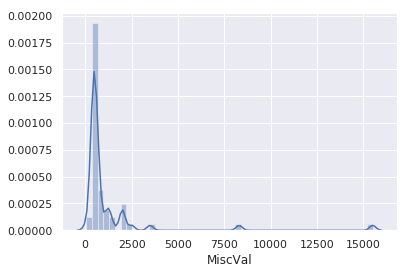

In [130]:
plot = sns.distplot(train_data['MiscVal'][(train_data['MiscVal'] != 0)].dropna())
plot.get_figure().savefig('../images/miscval-dist.png')
((train_data['MiscVal'].dropna())).describe()

5.165389977878334


count    1460.000000
mean        0.233456
std         1.226030
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.648660
Name: MiscVal, dtype: float64

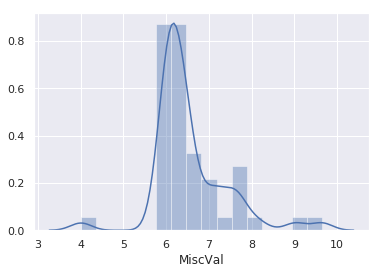

In [131]:
plot = sns.distplot(np.log1p(train_data['MiscVal'][(train_data['MiscVal'] != 0)].dropna()))
plot.get_figure().savefig('../images/miscvallog1p-dist.png')
print(stats.skew((np.log1p(train_data['MiscVal'].dropna()))))
(np.log1p(train_data['MiscVal'].dropna())).describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

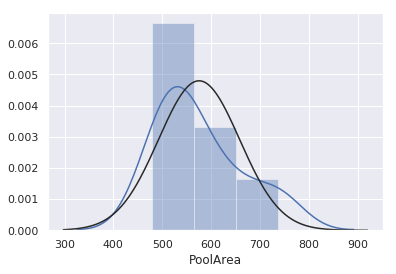

In [158]:
plot = sns.distplot((train_data['PoolArea'][train_data['PoolArea'] != 0].dropna()), fit = stats.norm)
plot.get_figure().savefig('../images/poolarea-dist.png')
((train_data['PoolArea'].dropna())).describe()

In [212]:
len((train_data['BsmtFinSF2'][train_data['BsmtFinSF2'] == 0].dropna()))/len(train_data)

0.8856164383561644

0.4939072758459356

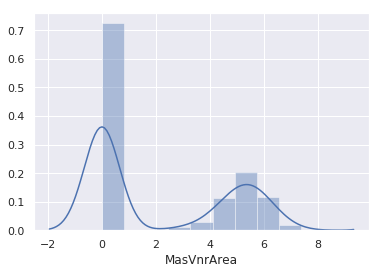

In [216]:
plot = sns.distplot(np.log1p(train_data['MasVnrArea'].dropna()))
# plot.get_figure().savefig('../images/kitchenabvgr-dist.png')
stats.skew(np.log1p(train_data['MasVnrArea'].dropna()))

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

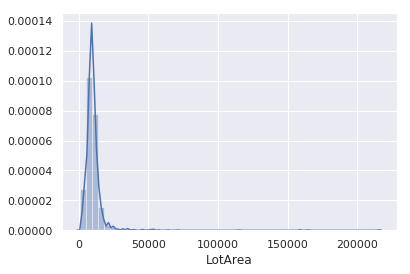

In [162]:
plot = sns.distplot((train_data['LotArea'].dropna()))
plot.get_figure().savefig('../images/lotarea-dist.png')
((train_data['LotArea'].dropna())).describe()

-0.13726327193353458

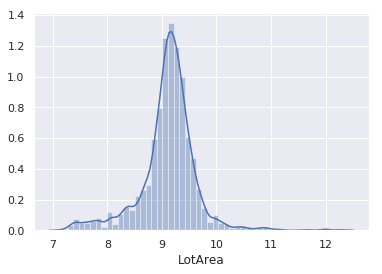

In [192]:
plot = sns.distplot(np.log1p(train_data['LotArea'].dropna()))
plot.get_figure().savefig('../images/lotarealog1p-dist.png')
stats.skew(np.log1p(train_data['LotArea'].dropna()))

2.160865994705543

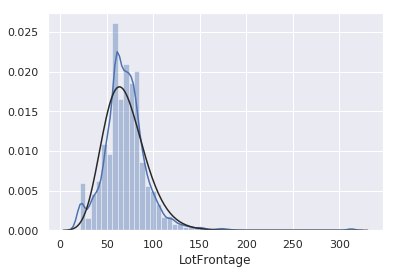

In [230]:
plot = sns.distplot((train_data['LotFrontage'].dropna()), fit = stats.lognorm)
plot.get_figure().savefig('../images/lotfrontage-dist.png')
stats.skew((train_data['LotFrontage'].dropna()))

-0.7278173750163187

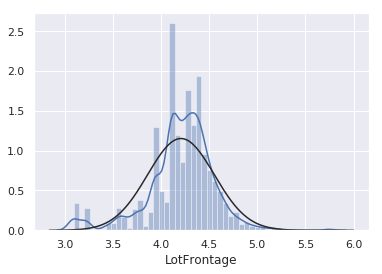

In [229]:
plot = sns.distplot(np.log1p(train_data['LotFrontage'].dropna()), fit = stats.norm)
plot.get_figure().savefig('../images/lotfrontagelog1p-dist.png')
stats.skew(np.log1p(train_data['LotFrontage'].dropna()))

1.3753417421837937

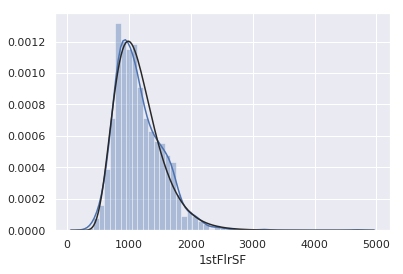

In [248]:
plot = sns.distplot((train_data['1stFlrSF'].dropna()), fit = stats.lognorm)
plot.get_figure().savefig('../images/1stflrsf-dist.png')
stats.skew((train_data['1stFlrSF'].dropna()))

0.08003175718429047

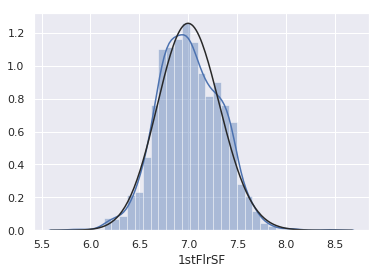

In [249]:
plot = sns.distplot(np.log1p(train_data['1stFlrSF'].dropna()), fit = stats.lognorm)
plot.get_figure().savefig('../images/1stflrsflog1p-dist.png')
stats.skew(np.log1p(train_data['1stFlrSF'].dropna()))

1.365155954773434

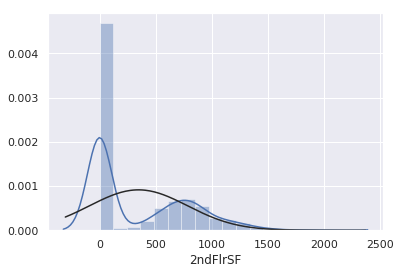

In [247]:
plot = sns.distplot((train_data['2ndFlrSF'].dropna()), fit = stats.norm)
plot.get_figure().savefig('../images/grlivarea-dist.png')
stats.skew((train_data['GrLivArea'].dropna()))

In [251]:
stats.skew(np.log1p(train_data['3SsnPorch'].dropna()))
# plot.get_figure().savefig('../images/3ssn-dist.png')
# ((train_data['3SsnPorch'].dropna())).describe()

7.727025709215359

In [259]:
train_data[train_data.columns][train_data[train_data.columns].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
correlation_matrix['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr